<a href="https://colab.research.google.com/github/Suryansh-Soni/ML-Models/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target:  ['setosa' 'versicolor' 'virginica']
Dataset shape:  (150, 4)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


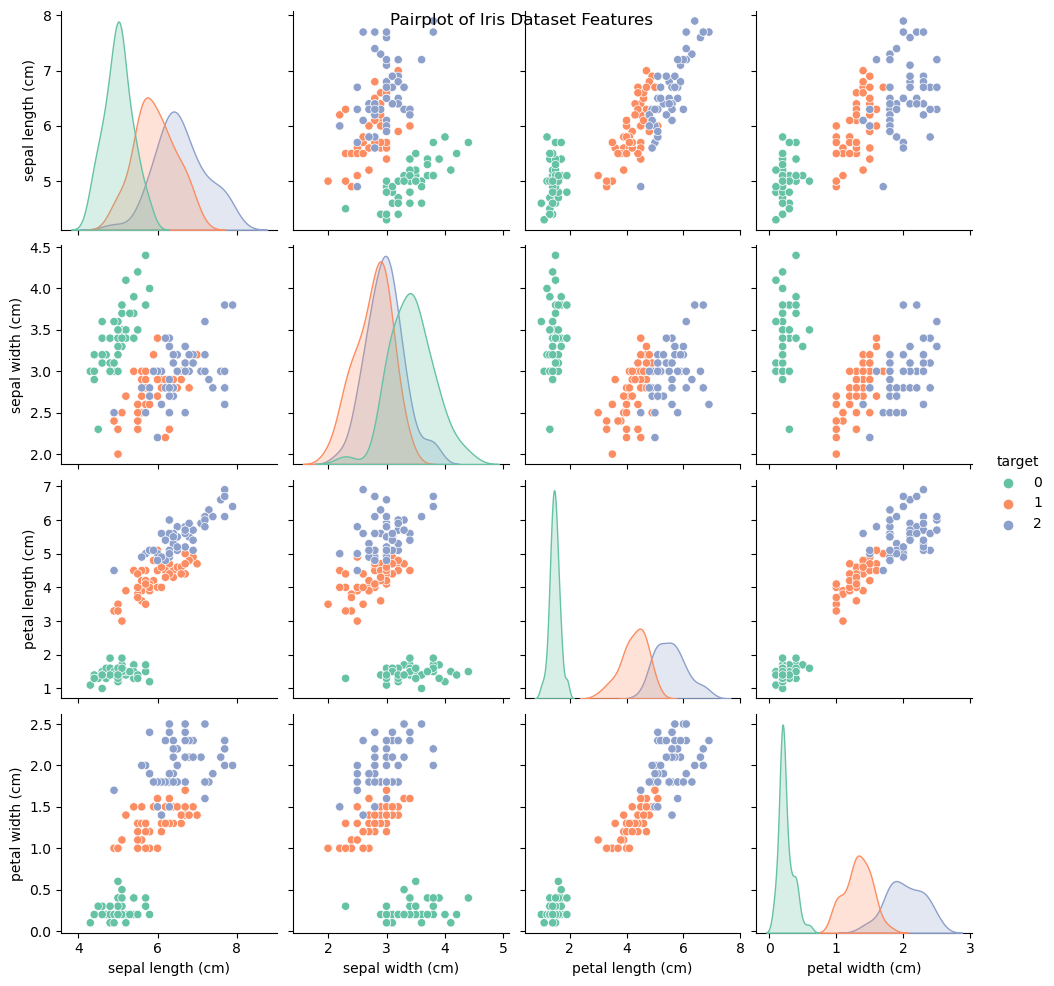

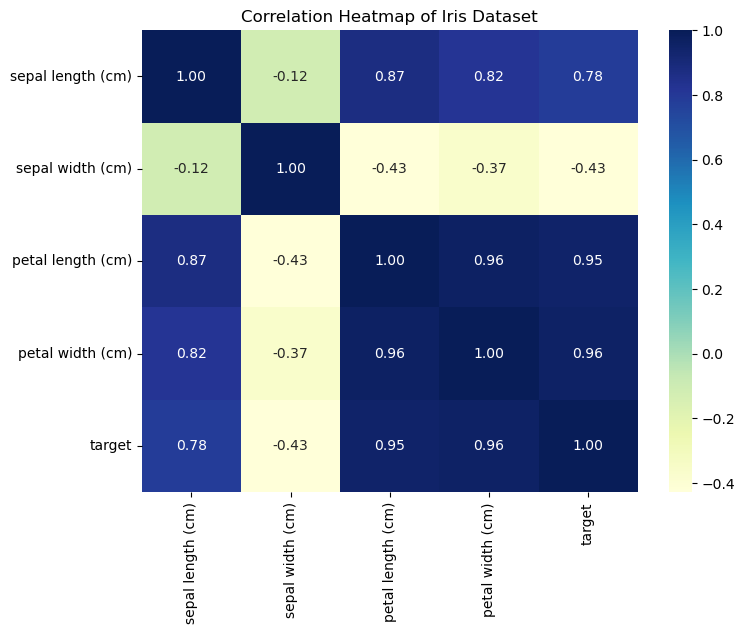

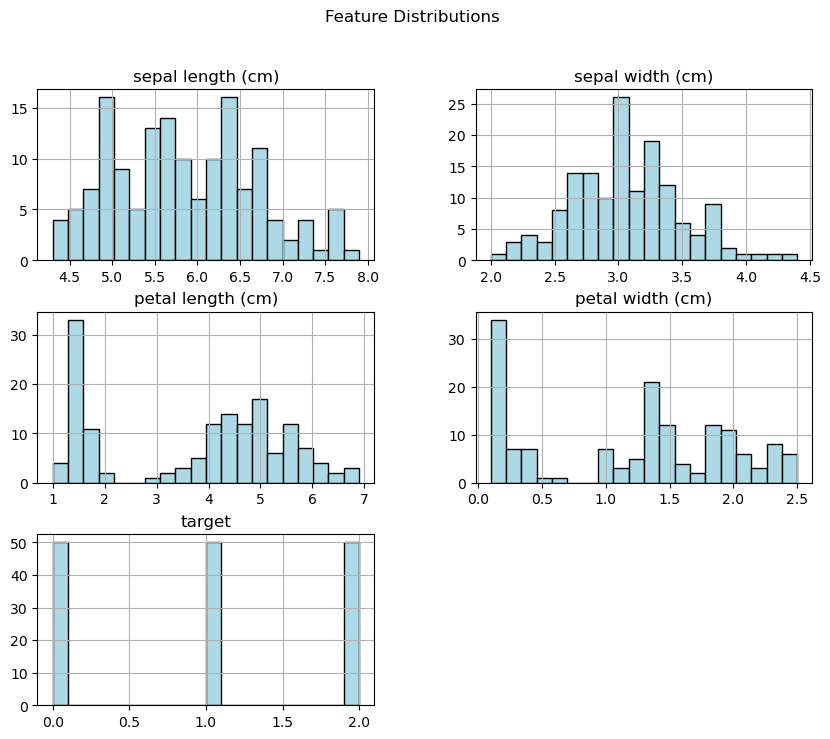

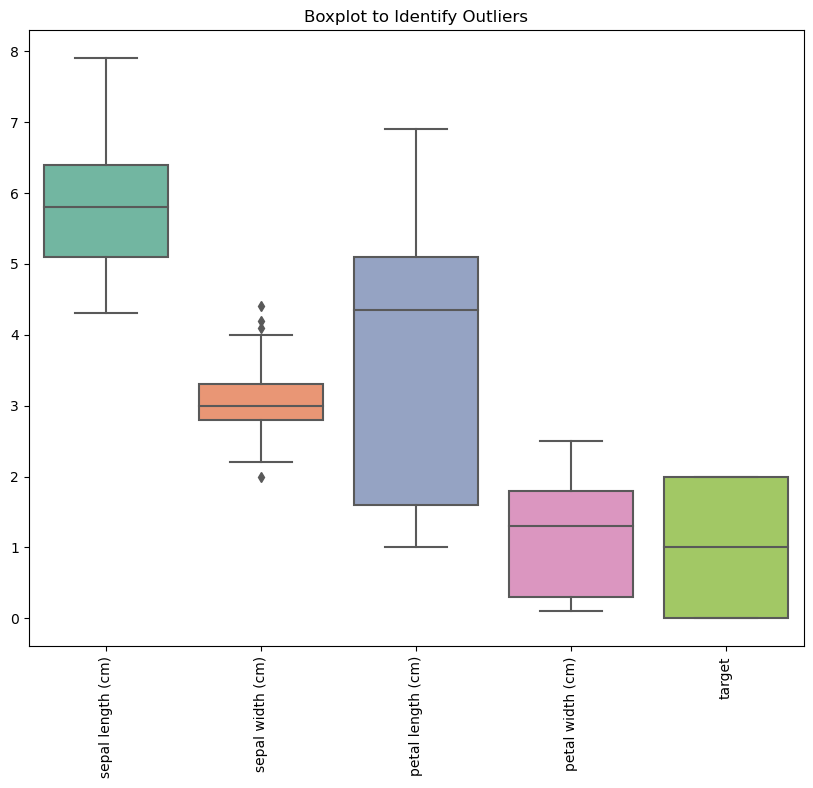

Checking for missing values...
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Accuracy:  0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, 

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Step 1: Data Collection
iris = datasets.load_iris()
X = iris.data
y = iris.target



iris_df = pd.DataFrame(X, columns=iris.feature_names)

iris_df['target'] = y

# Step 2: Data Analysis and EDA
print("Features: ", iris.feature_names)
print("Target: ", iris.target_names)
print("Dataset shape: ", X.shape)

# Pairplot for EDA
sns.pairplot(iris_df, hue='target', palette="Set2", diag_kind='kde')
plt.suptitle('Pairplot of Iris Dataset Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

# Distribution of each feature
iris_df.hist(bins=20, figsize=(10, 8), edgecolor='black', color='lightblue')
plt.suptitle('Feature Distributions')
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_df, palette="Set2")
plt.title('Boxplot to Identify Outliers')
plt.xticks(rotation=90)
plt.show()

# Step 3: Data Cleaning (Check for missing values)
print("Checking for missing values...")
print(iris_df.isnull().sum())

# Step 4: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Model Training
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = svm.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Display the best parameters
print("Best parameters found: ", grid.best_params_)

# Step 8: Save the Model to a PKL File
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

# Step 9: Load the Model and Make Predictions
with open('svm_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Predict with the loaded model
new_prediction = loaded_model.predict(X_test)
print("Predictions from loaded model: ", new_prediction)
print("Accuracy from loaded model: ", accuracy_score(y_test, new_prediction))



# SVR

Mean Squared Error: 0.3551984619989429
R² Score: 0.7289407597956454


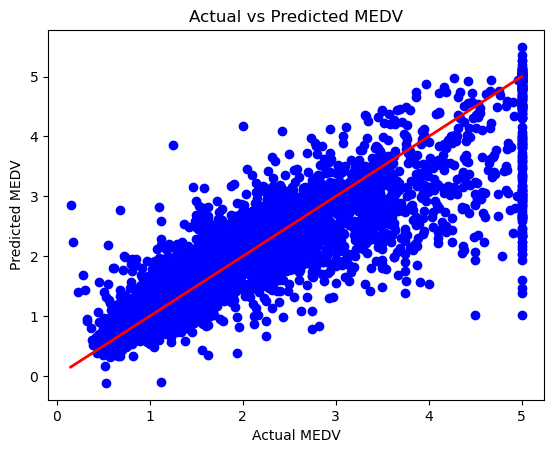

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data Collection
# Load the California housing dataset
california = datasets.fetch_california_housing()
X = california.data
y = california.target

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the SVR model with a default RBF kernel
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict on the test data
y_pred = svr.predict(X_test)

# Calculate the Mean Squared Error and R² score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Step 5: Plot Actual vs Predicted values
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.show()
